In [1]:
# 범주형... category 데이터
# 남/녀, 정품/가품, 0,1  : 바이너리 데이터.. 이진분류
# 다중 분류... 혈액형, 시도, 구군,, 컬러
# 수치화.. 머신러닝을 위해서... 방정식을 풀기위해..
# one-hoe encoding : 범주형 데이터의 개수만큼 가변수를 생성해서 존재 유무를 1또는 0으로 표현

In [2]:
# 남, 여    : 0 , 1
# red, green , blue  : 0, 1 , 2 
# red : [1,0,0]
# green : [0,1,0]
# blue : [0,0,1]

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({
    'source':[0,1,2],
    'target':[2,2,3],
    'weight':[3,4,5],
    'color' : ['red','blue','blue']
})
df

source  target  weight color
0       0       2       3   red
1       1       2       4  blue
2       2       3       5  blue

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  3 non-null      int64 
 1   target  3 non-null      int64 
 2   weight  3 non-null      int64 
 3   color   3 non-null      object
dtypes: int64(3), object(1)
memory usage: 224.0+ bytes


In [6]:
pd.get_dummies(df)

source  target  weight  color_blue  color_red
0       0       2       3           0          1
1       1       2       4           1          0
2       2       3       5           1          0

In [7]:
pd.get_dummies(df['color'])

blue  red
0     0    1
1     1    0
2     1    0

In [8]:
pd.get_dummies(df[['color']])

color_blue  color_red
0           0          1
1           1          0
2           1          0

In [9]:
# 필요에 따라서 정수형을 객체로 변경해서 처리
# weight는 숫자로 되어 있지만 기수형 데이터
# 데이터를 M,L,XL로 변경해서 원핫인코딩

In [10]:
weight_dict = {3:'M', 4:'L', 5:"XL"}
df['weight_sign'] = df['weight'].map(weight_dict)
df

source  target  weight color weight_sign
0       0       2       3   red           M
1       1       2       4  blue           L
2       2       3       5  blue          XL

In [14]:
pd.get_dummies(df['weight_sign'])

L  M  XL
0  0  1   0
1  1  0   0
2  0  0   1

In [16]:
df = pd.concat([df,pd.get_dummies(df['weight_sign'])], axis=1 )
df

source  target  weight color weight_sign  L  M  XL
0       0       2       3   red           M  0  1   0
1       1       2       4  blue           L  1  0   0
2       2       3       5  blue          XL  0  0   1

In [19]:
# 0 ~ 100 사이의 임의의 값으로  데이터를 30개만 추출해서 
import random
raw_data = {
    'score' : [ random.randrange(100) for i in range(30)]
}
df = pd.DataFrame(raw_data)
df.head()

score
0     95
1     12
2      9
3      9
4     60

In [20]:
# 연속적인 수치형 데이터를 범주형 데이터로 변경
# 0~25,25~50,50~75,75~100 : 'low','okay','good','great'

In [22]:
binds = [0,25,50,75,100]
gnames = ['low','okay','good','great']
df['category'] = pd.cut(df['score'], binds, labels=gnames)
df

score category
0      95    great
1      12      low
2       9      low
3       9      low
4      60     good
5      44     okay
6      36     okay
7      10      low
8      13      low
9      40     okay
10     74     good
11     40     okay
12     92    great
13     44     okay
14     95    great
15     28     okay
16     93    great
17     27     okay
18     28     okay
19     98    great
20     37     okay
21      5      low
22     49     okay
23     96    great
24     54     good
25     73     good
26     90    great
27     31     okay
28     95    great
29     35     okay

In [23]:
# scaling : 데이터의 범위를 맞춘다.
# 데이터의 특징 또는 형태등을 변경하지 않는 상태에서 값의 범위만 일정하게 같이 맞춰주는 역활
# min-max scaling
# 최소값-최대값 정규화
# 최소값과 최대값을 기준으로 0에서 1 또는 0에서 지정한 값까지 값의 크기를 변화
# xi - min(x) / max(x) - min(x)
# z-score 정규화(z-score normalization)  : 기존값을 표준 정규분포값으로 변환
# xi - 열의평균 / 열의표준편차

In [26]:
df = pd.DataFrame({
    'a':[random.randrange(20) for i in range(5)],
    'b':[random.randrange(100,200) for i in range(5)],
    'c':['big','small','big','small','samll']
})
df

a    b      c
0  11  147    big
1  17  170  small
2  19  139    big
3  15  161  small
4   0  116  samll

In [29]:
df['a'] - df['a'].min()

0    11
1    17
2    19
3    15
4     0
Name: a, dtype: int64

In [30]:
#  ai - min(a) / max(a) - min(a)
(df['a'] - df['a'].min() ) / (df['a'].max() - df['a'].min() )


0    0.578947
1    0.894737
2    1.000000
3    0.789474
4    0.000000
Name: a, dtype: float64

In [32]:
# z-score 적용
# xi - 열의평균 / 열의표준편차
(df['a'] - df['a'].mean())  / df['a'].std()

0   -0.185761
1    0.610357
2    0.875729
3    0.344984
4   -1.645309
Name: a, dtype: float64

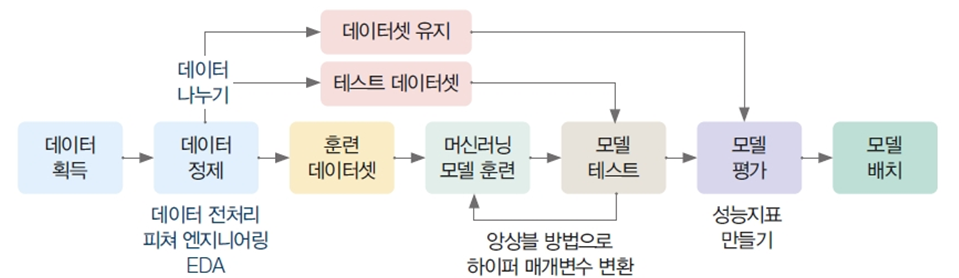

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid', color_codes=True)

In [40]:
# 두 개의 csv 읽어서 하나의 df로 만들기
df_train = pd.read_csv('/content/train.csv')
df_test =  pd.read_csv('/content/test.csv')
df = pd.concat([df_train,df_test])
df.head()
# 데이터분석시에는 각 컬럼에대한 표를 만든다  - 데이터 노트 - 
# 변수명  의미   데이터 타입  값 종류

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [42]:
# 데이터의 모양을 확인
df.head(2).T

0  \
PassengerId                        1   
Survived                         0.0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                             22.0   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Cabin                            NaN   
Embarked                           S   

                                                             1  
PassengerId                                                  2  
Survived                                                   1.0  
Pclass                                                       1  
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...  
Sex                                                     female  
Age                                                       38.0  
SibSp                                                        1  
Parch                                                        0  
Ticket                                                PC 17599  
Fare                                                   71.2833  
Cabin                                                      C85  
Embarked                                                     C

In [58]:
# 결측치 확인 전략 - 비율을 확인하여 전략을 세움
# 판다스 옵션 조정 : 소수점 두번째 까지 출력
pd.options.display.float_format = '{:.4f}'.format

In [61]:
# 결측치값의 평균
temp = df.isna().mean()
temp[temp>0]

Survived   0.3193
Age        0.2009
Fare       0.0008
Cabin      0.7746
Embarked   0.0015
dtype: float64

In [63]:
# 전략적인 의사결정을 위해 삭제 또는 채움
# 결측치 Age를 pclass별로 평균을 구해서 fill
df['Age'].fillna(
    df.groupby(['Pclass'])['Age'].transform('mean'),
    inplace=True
)

In [64]:
# 결측치값의 평균
temp = df.isna().mean()
temp[temp>0]

Survived   0.3193
Fare       0.0008
Cabin      0.7746
Embarked   0.0015
dtype: float64

In [70]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [74]:
df = df.reset_index(drop=True)

In [78]:
df.loc[[61,829],'Embarked'] = 'S'

In [88]:
df[df['Cabin'].notnull()]

PassengerId  Survived  Pclass  \
1               2    1.0000       1   
3               4    1.0000       1   
6               7    0.0000       1   
10             11    1.0000       3   
11             12    1.0000       1   
...           ...       ...     ...   
1295         1296       NaN       1   
1296         1297       NaN       2   
1298         1299       NaN       1   
1302         1303       NaN       1   
1305         1306       NaN       1   

                                                   Name     Sex     Age  \
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female 38.0000   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female 35.0000   
6                               McCarthy, Mr. Timothy J    male 54.0000   
10                      Sandstrom, Miss. Marguerite Rut  female  4.0000   
11                             Bonnell, Miss. Elizabeth  female 58.0000   
...                                                 ...     ...     ...   
1295                       Frauenthal, Mr. Isaac Gerald    male 43.0000   
1296       Nourney, Mr. Alfred (Baron von Drachstedt")"    male 20.0000   
1298                         Widener, Mr. George Dunton    male 50.0000   
1302    Minahan, Mrs. William Edward (Lillian E Thorpe)  female 37.0000   
1305                       Oliva y Ocana, Dona. Fermina  female 39.0000   

      SibSp  Parch         Ticket     Fare Cabin Embarked  
1         1      0       PC 17599  71.2833   C85        C  
3         1      0         113803  53.1000  C123        S  
6         0      0          17463  51.8625   E46        S  
10        1      1        PP 9549  16.7000    G6        S  
11        0      0         113783  26.5500  C103        S  
...     ...    ...            ...      ...   ...      ...  
1295      1      0          17765  27.7208   D40        C  
1296      0      0  SC/PARIS 2166  13.8625   D38        C  
1298      1      1         113503 211.5000   C80        C  
1302      1      0          19928  90.0000   C78        Q  
1305      0      0       PC 17758 108.9000  C105        C  

[295 rows x 12 columns]

In [89]:
# 범주형 데이터 처리
# 범주형 데이터 구분 - info()

In [93]:
df.rename(columns={'Sex':'Gender'},inplace=True)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [103]:
# 데이터 타입 정리
object_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [105]:
numeric_columns = list(df.dtypes[df.dtypes != 'object'].index)

In [106]:
object_columns,  numeric_columns 

(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'],
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [107]:
# 타입을 변경할때는 astype()

In [108]:
def merge_and_get(ldf,rdf, on, how='inner', index=None):
  if index is True:
    return pd.merge(ldf,rdf,how=how,left_index=True, right_index=True)
  else:
    return pd.merge(ldf,rdf,how=how, on=on)

In [110]:
ont_hot_df = merge_and_get(df,pd.get_dummies(df[['Gender']]),on=None,index=True  )
ont_hot_df = merge_and_get(df,pd.get_dummies(df[['Pclass']]),on=None,index=True  )
ont_hot_df = merge_and_get(df,pd.get_dummies(df[['Embarked']]),on=None,index=True  )



In [115]:
# y값과 범부형 타입간에 어떤 관계가 있는지를 확인
# 열별로 y_true 데이터와 합쳐서 비교 그래프로 나타내서 각 열이  생존여부에 영향을 주는지 시각적으로 확인

In [121]:
# 상관관계  Pclass    , Cabin        
df2 = df.drop(columns=['Pclass', 'Cabin','Survived' ])
df2.head()

PassengerId                                               Name  Gender  \
0            1                            Braund, Mr. Owen Harris    male   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2            3                             Heikkinen, Miss. Laina  female   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4            5                           Allen, Mr. William Henry    male   

      Age  SibSp  Parch            Ticket    Fare Embarked  
0 22.0000      1      0         A/5 21171  7.2500        S  
1 38.0000      1      0          PC 17599 71.2833        C  
2 26.0000      0      0  STON/O2. 3101282  7.9250        S  
3 35.0000      1      0            113803 53.1000        S  
4 35.0000      0      0            373450  8.0500        S

In [122]:
df2.corr()

<ipython-input-122-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


PassengerId     Age   SibSp   Parch   Fare
PassengerId       1.0000  0.0194 -0.0552  0.0089 0.0314
Age               0.0194  1.0000 -0.1989 -0.1312 0.1995
SibSp            -0.0552 -0.1989  1.0000  0.3736 0.1602
Parch             0.0089 -0.1312  0.3736  1.0000 0.2215
Fare              0.0314  0.1995  0.1602  0.2215 1.0000

<ipython-input-123-99dbc1571a0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

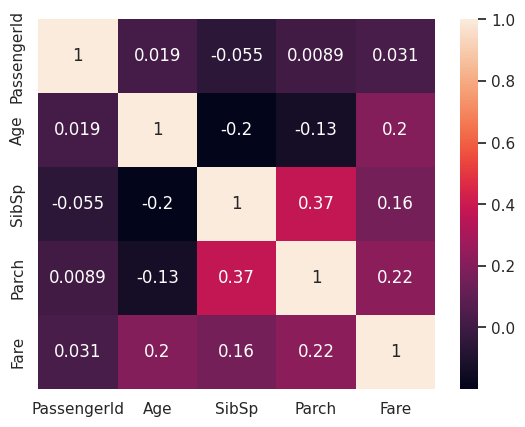

In [123]:
sns.heatmap(df2.corr(), annot=True)